In this notebook, we want to find where perfusion failed & why it failed. We only want to do this for the perfusion things we're going to use. Therefore, we should take the 4th parse, because the ones after that might be fixed (imaging might be quantified, pathology might appear from Joanna & Anny) 

In [1]:
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)


In [2]:
recgli = read.csv("../ParseData/2ndparse_researchPath_withInVivo.csv")

In [3]:
dim(recgli)

[1] 607  74

In [4]:
head(recgli)

b_number,t_number,sf_number,current_scan_date,current_surgery_date,current_hist_grade,current_hist_type,roi.label,tumor_cell_evaluation,necrosis,f8_delicate,f8_simple,f8_complex,mib_1,bx_pure_treatment_effect,nfse,nfl,nt1c,nt1v,nadc.1,nfa.1,nev1.1,nev2.1,nev3.1,nevrad.1,nadc.2,nfa.2,nev1.2,nev2.2,nev3.2,nevrad.2,cbvn_nlin,phn_nlin,phn_npar,recovn_npar,cni,ccri,crni,ncho,ncre,nnaa,nlip,laclip,nlac,olddata,newdata,comments,notes.,imaging_code,perf_quant,cbv_nlin,spec_quant,include_anat,include_diffu1000,include_diffu2000,include_diffu_all,include_perf,include_spec,include_one_advanced_mod,include_all_advanced_mods,X.CEL,X.NEL,X.NEC,sum,in_CEL,in_T2all,in_NEL,in_NEC,in_ROI,desired_hist,multnom_out,no_ffpe,waiting_on_path,rhgg_txe_analysis
2723,6369,8122,9/13/09,9/14/09,Grade IV,Glioblastoma,10B28,0,0,2,1,0,0.82,t,2.10,1.84,1.20,0.84,1.31,0.75,1.19,1.28,1.58,1.45,NA,NA,NA,NA,NA,NA,0.66,0.81,0.79,100.00,4.98,3.28,0.24,1.65,0.53,0.41,-0.01,0.27,0.28,1,0,,NA,NA,,NA,0,1,1,0,1,1,1,1,1,53.85,46.15,NA,100.00,1,1,0,0,1,1,TxE,0,0,1
2312,5317,7679,5/4/08,5/4/08,Grade IV,Glioblastoma,11B16,2,1,2,3,0,3.31,f,2.27,1.44,1.88,0.78,1.92,0.68,1.63,1.93,2.34,2.14,1.91,1.03,1.91,1.87,1.88,1.92,2.24,2.25,2.25,98.51,1.56,0.30,0.75,0.86,0.84,0.46,0.61,1.08,0.47,1,0,,NA,NA,,NA,0,1,1,1,1,1,1,1,1,100.00,0.00,NA,100.00,1,1,0,0,1,1,rHGG,0,0,1
2901,8089,8403,6/25/10,6/30/10,Grade IV,Glioblastoma,11B35,3,2,1,0,0,NA,f,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,biopsy_quant,biopsymask-nonexist,NA,NA,0,0,0,0,0,0,0,0,NA,NA,NA,NA,0,0,0,0,0,1,NecDNI,0,0,0
2474,7408,8701,3/23/11,3/24/11,Grade IV,Glioblastoma,11B40,,,,,,NA,,1.84,1.13,0.82,0.79,1.71,0.50,1.35,1.79,2.47,2.12,1.71,0.68,1.43,1.72,2.02,1.96,1.23,1.28,1.21,100.00,2.48,0.22,1.66,0.88,0.81,0.37,0.24,0.56,0.32,1,0,,NA,NA,,NA,0,1,1,1,1,1,1,1,1,8.70,13.04,NA,21.74,0,0,0,0,0,1,dneDNI,0,1,0
3169,7540,8796,6/19/11,6/20/11,Grade IV,Glioblastoma,11B43,2,0,3,0,0,17.00,f,2.35,1.97,0.76,0.78,1.34,0.68,1.13,1.34,1.63,1.50,NA,NA,NA,NA,NA,NA,0.58,0.67,0.60,100.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,NA,,NA,NA,1,1,0,1,1,0,1,0,0.00,28.00,NA,28.00,0,1,1,0,1,1,rHGG,0,0,1
2312,5317,7679,5/4/08,5/4/08,Grade IV,Glioblastoma,12B16,2,1,3,2,0,12.84,f,2.20,1.56,2.04,0.74,2.04,0.89,1.83,2.12,2.22,2.23,1.75,0.69,1.54,1.72,2.16,1.96,1.71,1.73,1.88,99.20,2.46,1.30,0.55,1.19,0.87,0.59,0.34,0.83,0.49,1,0,PP necrosis; some hyalinized BV; tissue is 2/3 tumor score of 3 and 1/3 score of 1,NA,NA,,NA,0,1,1,1,1,1,1,1,1,100.00,0.00,NA,100.00,1,1,0,0,1,1,rHGG,0,0,1


In [5]:
data.frame(index = 1:length(colnames(recgli)), colnames = colnames(recgli))

index,colnames
1,b_number
2,t_number
3,sf_number
4,current_scan_date
5,current_surgery_date
6,current_hist_grade
7,current_hist_type
8,roi.label
9,tumor_cell_evaluation
10,necrosis


## 1. Graph perfusion parameters to see where and how fitting may have failed: 

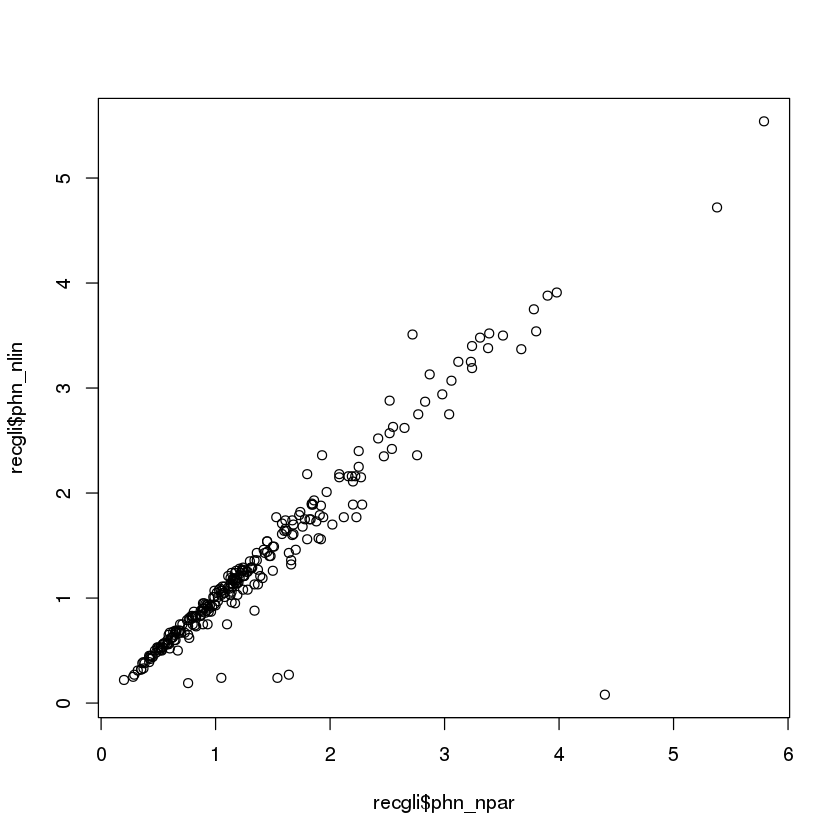

In [10]:
plot(recgli$phn_npar, recgli$phn_nlin)

In [11]:
recgli[which(recgli$phn_npar > 0.5 & recgli$phn_nlin < 0.5 ),]


,b_number,t_number,sf_number,current_scan_date,current_surgery_date,current_hist_grade,current_hist_type,roi.label,tumor_cell_evaluation,necrosis,f8_delicate,f8_simple,f8_complex,mib_1,bx_pure_treatment_effect,nfse,nfl,nt1c,nt1v,nadc.1,nfa.1,nev1.1,nev2.1,nev3.1,nevrad.1,nadc.2,nfa.2,nev1.2,nev2.2,nev3.2,nevrad.2,cbvn_nlin,phn_nlin,phn_npar,recovn_npar,cni,ccri,crni,ncho,ncre,nnaa,nlip,laclip,nlac,olddata,newdata,comments,notes.,imaging_code,perf_quant,cbv_nlin,spec_quant,include_anat,include_diffu1000,include_diffu2000,include_diffu_all,include_perf,include_spec,include_one_advanced_mod,include_all_advanced_mods,X.CEL,X.NEL,X.NEC,sum,in_CEL,in_T2all,in_NEL,in_NEC,in_ROI,desired_hist,multnom_out,no_ffpe,waiting_on_path,rhgg_txe_analysis
79,3043,7227,8580,12/16/10,12/27/10,Treatment Effect,Treatment Effect,36B39,,,,,,NA,,1.74,1.15,1.18,0.58,1.56,1.83,1.46,1.49,1.55,1.60,1.55,1.53,1.64,1.29,1.14,1.29,0.03,0.08,4.40,81.29,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,NA,NA,NA,,NA,NA,1,1,1,1,1,0,1,0,50,0,NA,50,1,0,0,0,1,1,dneDNI,0,1,0
154,2850,7016,8314,4/23/10,4/23/10,Grade IV,Glioblastoma,62B33,0,2,1,0,0,0.00,t,2.60,1.99,0.82,NA,0.56,0.58,0.45,0.57,0.74,0.67,0.54,0.42,0.42,0.55,0.77,0.65,0.03,0.27,1.64,100.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,SMI regions of 3 and 0; 2 frag one necrotic one nl brain,NA,NA,,NA,NA,1,1,1,1,1,0,1,0,0,100,NA,100,0,1,1,0,1,1,NecDNI,0,0,0
179,2847,6630,8250,2/19/10,2/23/10,Grade IV,Glioblastoma,70B31,0,0,1,0,0,4.54,t,1.43,1.42,1.72,NA,1.57,0.93,1.45,1.65,1.96,1.74,NA,NA,NA,NA,NA,NA,0.01,0.24,1.54,100.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,MIB all BV; 100% hyalinized tissue,NA,NA,,NA,NA,1,1,0,1,1,0,1,0,100,0,0,100,1,1,0,0,1,1,TxE,0,0,1
261,2592,7451,8728,4/19/11,4/20/11,Grade IV,Glioblastoma,85B41,2,0,1,1,1,24.51,f,2.80,1.40,1.69,0.89,1.56,0.39,1.27,1.55,1.98,1.78,1.37,0.44,1.12,1.37,1.66,1.55,0.78,0.24,1.05,100.00,9.05,6.42,2.34,2.19,0.65,0.15,0.2,0.26,0.06,1,0,,NA,NA,,NA,0,1,1,1,1,1,1,1,1,NA,NA,NA,NA,1,1,0,0,1,1,rHGG,0,0,1
269,2592,7451,8728,4/19/11,4/20/11,Grade IV,Glioblastoma,86B41,1,0,3,0,0,22.37,f,2.94,1.56,1.03,0.93,2.61,0.75,2.26,2.71,2.82,2.83,2.40,0.91,2.22,2.38,2.38,2.46,0.63,0.19,0.76,100.00,-0.15,-0.68,0.54,-0.03,0.11,0.00,0.1,0.17,0.07,1,0,,NA,NA,,NA,0,1,1,1,1,1,1,1,1,NA,NA,NA,NA,0,1,1,0,1,1,Ts1DNI,0,0,0


In [19]:
## this seems to capture all of those outliers; it is also useful that some where perf fitting failed are in the same patient
## let's add in a code for these guys 
colnames(recgli)
table(recgli$perf_quant)
quant_too_low = which(recgli$phn_npar > 0.5 & recgli$phn_nlin < 0.5 )
#recgli$perf_quant[which(recgli$phn_npar > 0.5 & recgli$phn_nlin < 0.5 )] = "quant_too_low"

[1] "b_number"                  "t_number"                 
 [3] "sf_number"                 "current_scan_date"        
 [5] "current_surgery_date"      "current_hist_grade"       
 [7] "current_hist_type"         "roi.label"                
 [9] "tumor_cell_evaluation"     "necrosis"                 
[11] "f8_delicate"               "f8_simple"                
[13] "f8_complex"                "mib_1"                    
[15] "bx_pure_treatment_effect"  "nfse"                     
[17] "nfl"                       "nt1c"                     
[19] "nt1v"                      "nadc.1"                   
[21] "nfa.1"                     "nev1.1"                   
[23] "nev2.1"                    "nev3.1"                   
[25] "nevrad.1"                  "nadc.2"                   
[27] "nfa.2"                     "nev1.2"                   
[29] "nev2.2"                    "nev3.2"                   
[31] "nevrad.2"                  "cbvn_nlin"                
[33] "phn_nlin"                  "phn_npar"                 
[35] "recovn_npar"               "cni"                      
[37] "ccri"                      "crni"                     
[39] "ncho"                      "ncre"                     
[41] "nnaa"                      "nlip"                     
[43] "laclip"                    "nlac"                     
[45] "olddata"                   "newdata"                  
[47] "comments"                  "notes."                   
[49] "imaging_code"              "perf_quant"               
[51] "cbv_nlin"                  "spec_quant"               
[53] "include_anat"              "include_diffu1000"        
[55] "include_diffu2000"         "include_diffu_all"        
[57] "include_perf"              "include_spec"             
[59] "include_one_advanced_mod"  "include_all_advanced_mods"
[61] "X.CEL"                     "X.NEL"                    
[63] "X.NEC"                     "sum"                      
[65] "in_CEL"                    "in_T2all"                 
[67] "in_NEL"                    "in_NEC"                   
[69] "in_ROI"                    "desired_hist"             
[71] "multnom_out"               "no_ffpe"                  
[73] "waiting_on_path"           "rhgg_txe_analysis"


                                      all_zeros     biopsymask-nonexist 
                    261                      45                      30 
          extreme_value noPerf_or_makePerfIssue     perf_align-nonexist 
                      1                     227                      27 
      PERF_BIOPSY_ISSUE   t_B_outside_perfusion 
                      2                       9 

In [21]:
recgli$perf_quant = as.character(recgli$perf_quant)

In [22]:
recgli$perf_quant[quant_too_low] = "quant_too_low"

In [23]:
table(recgli$perf_quant)


                                      all_zeros     biopsymask-nonexist 
                    261                      45                      30 
          extreme_value noPerf_or_makePerfIssue     perf_align-nonexist 
                      1                     227                      27 
      PERF_BIOPSY_ISSUE           quant_too_low   t_B_outside_perfusion 
                      2                       5                       9 

In [128]:
# since phn_nlin has quant_failure notifications, let's place the character values of phn_nlin into a separate column:
recgli = data.frame(recgli, perf_failure_reasons = recgli$phn_nlin)
dim(recgli)

[1] 607  73

In [129]:
recgli$perf_failure_reasons = gsub("[[:digit:]]", "", as.character(recgli$perf_failure_reasons))


In [130]:
recgli$perf_failure_reasons = recgli$perf_failure_reasons 

[1] "."                     "."                     "biopsymask-nonexist"  
  [4] "."                     "."                     "."                    
  [7] "."                     ""                      "biopsymask-nonexist"  
 [10] "."                     "."                     "biopsymask-nonexist"  
 [13] "."                     "."                     "."                    
 [16] "."                     "."                     "."                    
 [19] ""                      "."                     "."                    
 [22] "."                     "."                     ""                     
 [25] "."                     "t_B_outside_perfusion" "."                    
 [28] "."                     "biopsymask-nonexist"   NA                     
 [31] "."                     "."                     ""                     
 [34] "biopsymask-nonexist"   ""                      "biopsymask-nonexist"  
 [37] "perf_align-nonexist"   "perf_align-nonexist"   "biopsymask-nonexist"  
 [40] "biopsymask-nonexist"   "biopsymask-nonexist"   "biopsymask-nonexist"  
 [43] "biopsymask-nonexist"   ""                      ""                     
 [46] "."                     "."                     "."                    
 [49] "."                     ""                      "."                    
 [52] "."                     "."                     "biopsymask-nonexist"  
 [55] NA                      NA                      "."                    
 [58] "perf_align-nonexist"   "."                     "perf_align-nonexist"  
 [61] "."                     "perf_align-nonexist"   "."                    
 [64] "."                     "."                     "."                    
 [67] "."                     "perf_align-nonexist"   "."                    
 [70] "."                     "."                     "."                    
 [73] "."                     "."                     ""                     
 [76] "."                     "."                     "biopsymask-nonexist"  
 [79] "."                     "."                     NA                     
 [82] ""                      "."                     "."                    
 [85] "."                     NA                      ""                     
 [88] NA                      "biopsymask-nonexist"   "."                    
 [91] "."                     "."                     NA                     
 [94] "."                     "."                     "."                    
 [97] "."                     "."                     "."                    
[100] "."                     "."                     ""                     
[103] "."                     "."                     "biopsymask-nonexist"  
[106] "."                     "."                     "biopsymask-nonexist"  
[109] "."                     "t_B_outside_perfusion" "."                    
[112] NA                      "."                     "."                    
[115] "biopsymask-nonexist"   "perf_align-nonexist"   "."                    
[118] "PERF_BIOPSY_ISSUE"     "biopsymask-nonexist"   "perf_align-nonexist"  
[121] "."                     ""                      "PERF_BIOPSY_ISSUE"    
[124] "biopsymask-nonexist"   "."                     ""                     
[127] "biopsymask-nonexist"   "."                     ""                     
[130] "."                     ""                      ""                     
[133] "t_B_outside_perfusion" "."                     "."                    
[136] "."                     "t_B_outside_perfusion" "."                    
[139] "."                     "."                     NA                     
[142] "."                     "."                     "."                    
[145] ""                      "."                     "biopsymask-nonexist"  
[148] "."                     "."                     "."                    
[151] "."                     "."                     "."                    
[154] "."               

In [ ]:
## now need to get rid of those & make the phn_nonlin all numeric: 

In [27]:
perf_quant = recgli[which(nchar(recgli$perf_quant)>2),]

In [28]:
write.csv(perf_quant, "biopsies_i_want_to_use_where_perf_failed_to_janine.csv", row.names = F)